In [89]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
from pathlib import Path
import pandas as pd
import dataset.assemble as assemble
import plot_utils as plot
pd.set_option('display.max_colwidth', -1)
from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

In [96]:
df = assemble.get_dataset_df('/data/staff/common/ML-crystals/csv/test0.5.csv')
df = assemble.get_dataset(df, (128, 128, 3))

loading meta files
meta loaded


  0%|          | 0/12376 [00:00<?, ?it/s]

row mapping row_pipeline


  0%|          | 51/12376 [00:07<22:32,  9.11it/s]

KeyboardInterrupt: 

In [91]:
images = [cv.imread(fp) for fp in df['filename'][:8]]
titles = df['y'].iloc[:8].values

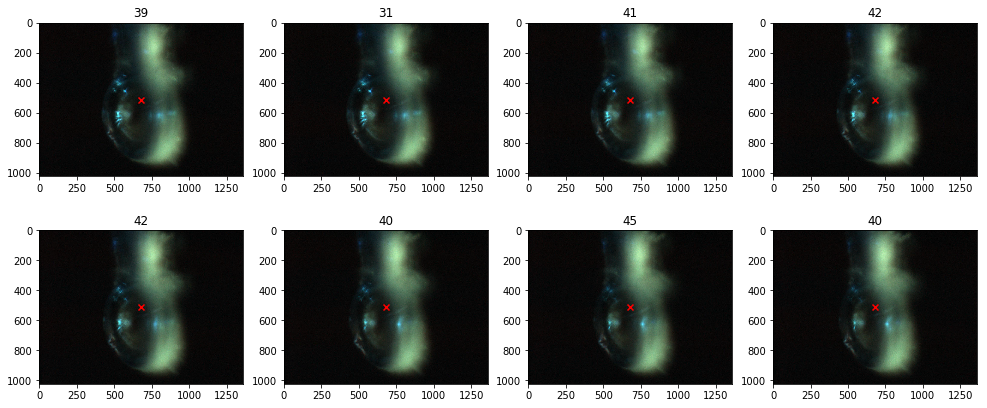

In [92]:
plot.image_grid(images, titles)

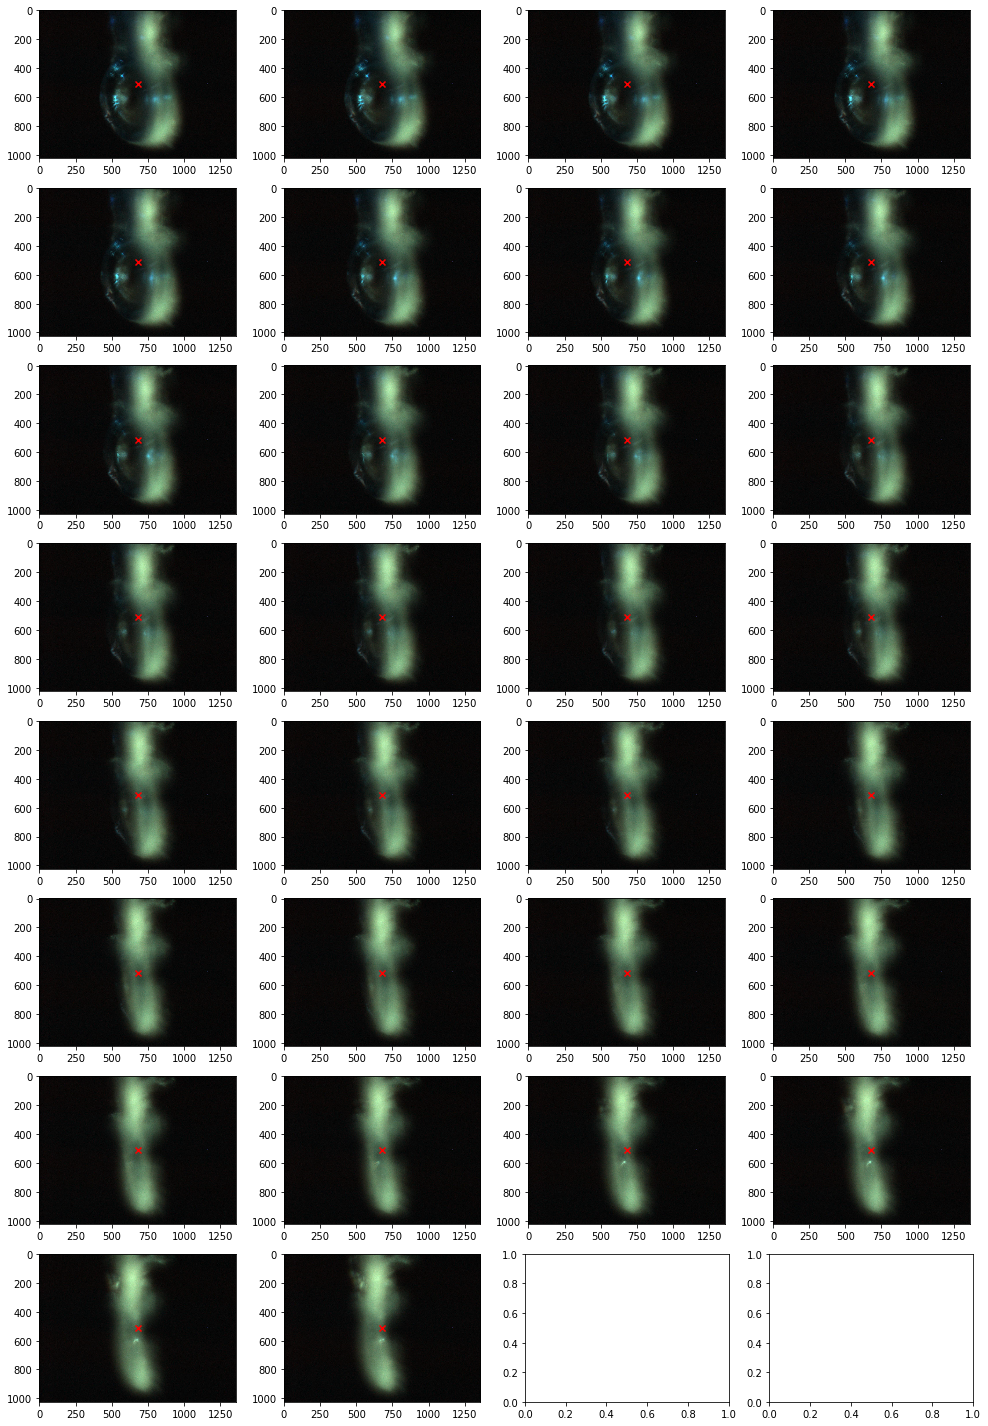

In [78]:
samples = set([(row['sample'], row['scan']) for _, row in df[['sample', 'scan']].iterrows()])
data = []
for s in samples:
    tmp = df[(df['filename'].str.contains(s[0])) & (df['filename'].str.contains(s[1]))]
    tmp = tmp[['filename', 'y']]
    half = len(tmp) // 2
    d = dict(min=list(tmp.iloc[:half:5, :].itertuples(index=False, name=None)), max=list(tmp.iloc[-half::5, :].itertuples(index=False, name=None)))
    data.append(d)
    
print(len(data))

In [4]:
samples = set([(row['sample'], row['scan']) for _, row in df[['sample', 'scan']].iterrows()])
data = []
for s in samples:
    tmp = df[(df['filename'].str.contains(s[0])) & (df['filename'].str.contains(s[1]))]
    tmp = tmp[['filename', 'y']]
    half = len(tmp) // 2
    d = dict(min=list(tmp.iloc[:half:5, :].itertuples(index=False, name=None)), max=list(tmp.iloc[-half::5, :].itertuples(index=False, name=None)))
    data.append(d)
    
print(len(data))

112


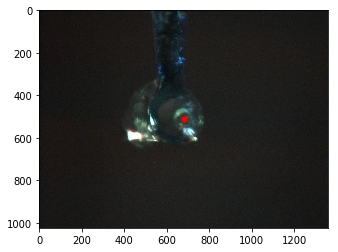

In [24]:
file,y = data[0]['min'][0]
img = cv.imread(file)
plt.imshow(img)
plt.scatter(img.shape[1]/2,img.shape[0]/2, s=25, c='red', marker='o')

In [26]:
def write_pdf(d: dict, nbr):
    print(nbr)
    l = len(list(d.values())[0])
    fig = plt.figure(figsize=(10, 6*l))
    for i, v in enumerate(d.values()):
        if len(v) == 0: continue
        for j, t in enumerate(v):
            j += 1
            idx = (j * 2) - (i ^ 1)
            file, y = t
            fig.add_subplot(len(v), len(d), idx)
            img = cv.imread(file, cv.IMREAD_COLOR)
            img = cv.resize(img, (512, 512))
            plt.imshow(img)
            plt.scatter(img.shape[1]/2,img.shape[0]/2, s=25, c='red', marker='o')
            plt.title(f"{file.split('/')[-1]}: {y}")
    fig.savefig(f"/data/staff/common/ML-crystals/pdfs/in-{str(nbr).zfill(3)}.pdf", bbox_inches='tight')
    plt.close(fig)

# [plot(d, i) for i, d in enumerate(data)]
i = 111
write_pdf(data[i], i)

111
